# Testing ESS Event Mode Toolkit (EMTK) 

## Lorentzian Curve / Cauchy Distribution

['/Users/phillipbentley/Code/python/mle', '/Users/phillipbentley/anaconda3/envs/ess/lib/python310.zip', '/Users/phillipbentley/anaconda3/envs/ess/lib/python3.10', '/Users/phillipbentley/anaconda3/envs/ess/lib/python3.10/lib-dynload', '', '/Users/phillipbentley/anaconda3/envs/ess/lib/python3.10/site-packages']
Loading ESS event mode toolkit (emtk)
Loading curves
Loading omega functions
Generated 2000 samples using parameters [0.01111111]
Lorentzian curve maximum likelihood estimation
2000 data points
[0.0001] as initial guess (kappa)
[0.01052277]  +/- [0.00019612]? solution obtained numerically
[0.01052277] solution obtained numerically
That a maximum was found is True via second derivative


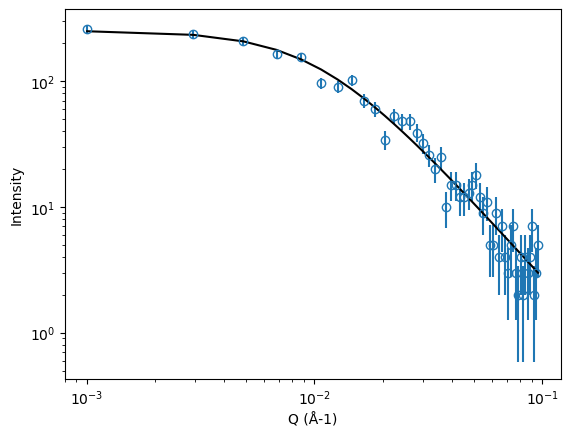

In [1]:
import sys
print(sys.path)

import emtk.curves.lorentzian as lor
import numpy as np
import matplotlib.pyplot as plt

clength = 90.0 # correlation length in system

kappa = 1.0 / clength
curv = lor.LorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 2000)
#curv.generatebackground(xrange, ratio=0.1) # method is resistant to a 10% background, which is pretty big
curv.mle()
#curv.report()
#curv.mleAnalytic()
curv.report()
curv.plotFit(logarithmic=True)
#a2 = curv.adtest()
#print("Anderson Darling test statistic:", a2)
#ks = curv.kstest()
#print("Kolmogorov Smirnov test statistic:", ks)


In [2]:
pars =  np.array([1.0/90.0])
qt = curv.Quantile(pars, 0.6)
nqt= curv.nQuantile(pars, 0.6)
print("qt :", qt)
print("nqt:", nqt)



qt : 0.0036102188470322916
nqt: [0.00361022]


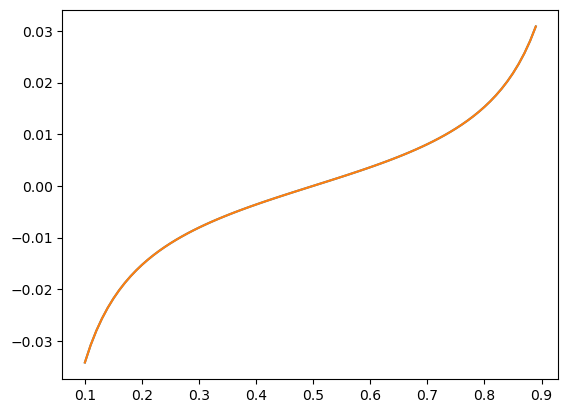

In [3]:
xs = np.arange(0.1, 0.9, 0.01)
ys = curv.Quantile(pars, xs)
nys= curv.nQuantile(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)
ax.plot(xs, nys)

In [4]:
curv.Quantile(pars, 0.8)

0.015293132449679708

In [5]:
curv.nQuantile(pars, 0.8)

array([0.01529313])

In [6]:
curv.cdf(pars, curv.Quantile(pars, 0.4))

0.4

In [7]:
curv.cdf(pars, curv.nQuantile(pars, 0.4))

array([0.4])

Loading ESS event mode toolkit (emtk)
Loading curves
Loading omega functions
Generated 50 samples using parameters [0.01428571]
[0.01502561] [[0.0003579]]
[0.01478971] [0.00266327]


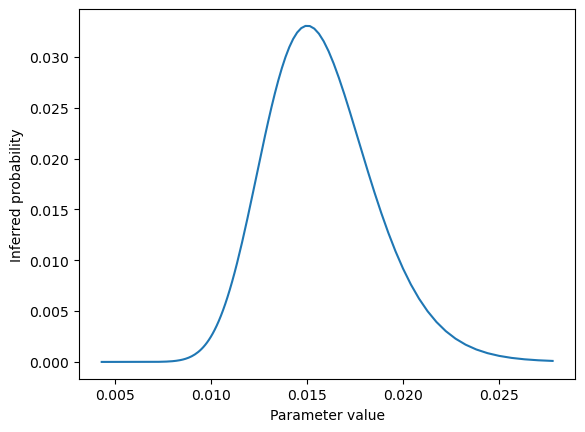

In [1]:
# Bayesian Inference

import emtk.curves.lorentzian as lor

import numpy as np
import matplotlib.pyplot as plt

clength = 70.0 # correlation length in system

kappa = 1.0 / clength
curvMLE = lor.LorentzianCurve()
curvBayes=lor.LorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curvMLE.generateTestSamples(pvalues, xrange, 50)
#curvMLE.generatebackground(xrange, ratio=0.1)
curvBayes.data = curvMLE.data
curvBayes.infer(plot=True)
curvMLE.mle()
print(curvMLE.estimates, curvMLE.variances)
print(curvBayes.estimates, curvBayes.variances)

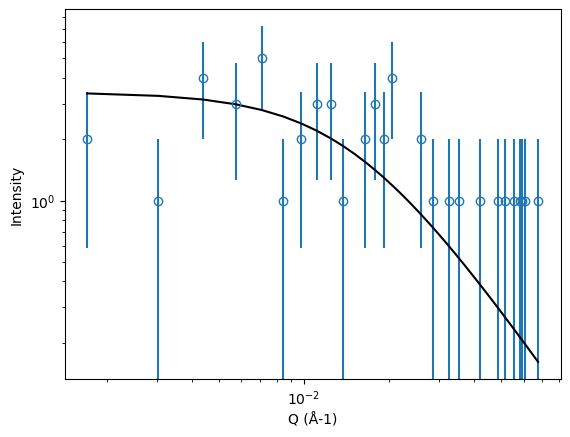

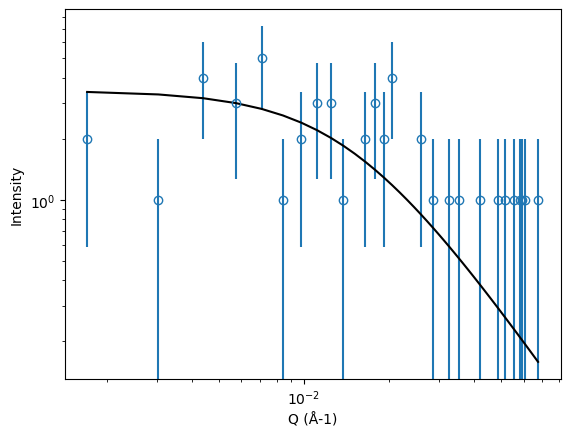

In [2]:
curvMLE.plotFit(logarithmic=True)
curvBayes.plotFit(logarithmic=True)

## Hard Spheres

Loading ESS event mode toolkit (emtk)
Loading curves
Loading omega functions
Generated 10000 samples using parameters [75.]
Hard sphere curve maximum likelihood estimation
10000 data points
[80.] as initial guess
[74.05661616] solution obtained numerically
The second derivative indicates that this is a maximum


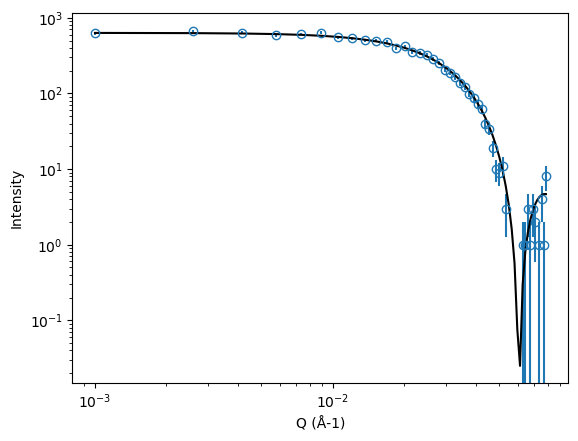

In [1]:
import emtk.curves.hardspheres as hard
import numpy as np
import matplotlib.pyplot as plt
curv = hard.HardSpheres()
pvalues = np.array([75.0])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 10000)
curv.guesses = np.array([80.0])
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

Adding flat background of 1000.0 points
Hard sphere curve maximum likelihood estimation
11000 data points
[80.] as initial guess
[90.97678307] solution obtained numerically
The second derivative indicates that this is not a maximum


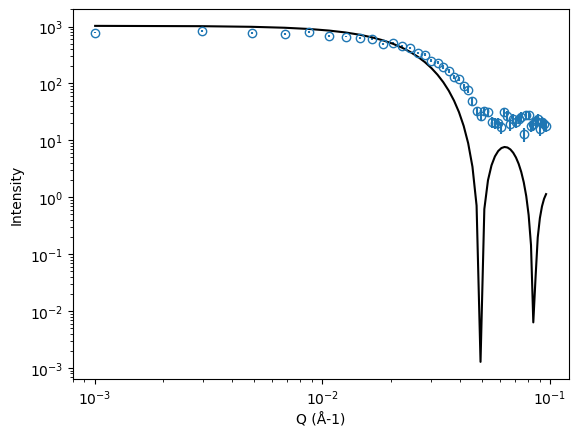

In [2]:
# It is quite tolerant of backgrounds here as well
curv.generatebackground(xrange, ratio=0.1)
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

# Porod Scattering

Loading ESS event mode toolkit (emtk)
Loading curves
Loading omega functions
Generated 6000 samples using parameters [4.e+00 1.e-03]
Calculating best minimal value for power law fit
Generalised Porod curve maximum likelihood estimation
6000 data points
[3.6   0.005] as initial guesses (z, qmin)
[3.91862293e+00 1.32432311e-03] solution obtained analytically


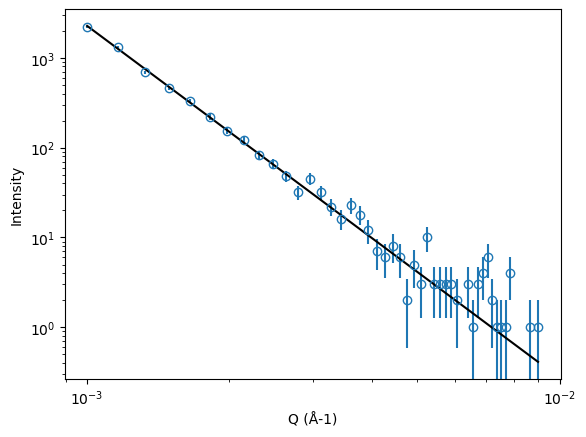

In [1]:
import emtk.curves.porod as por

import emtk
import numpy as np
import matplotlib.pyplot as plt
curv = por.PorodCurve()
pvalues = np.array([4.0, 0.001])
xrange = np.array([0.001, 0.01])
curv.generateTestSamples(pvalues, xrange, 6000)
curv.guesses = np.array([3.6, 0.005])
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

Adding flat background of 6.0 points
Calculating best minimal value for power law fit
Generalised Porod curve maximum likelihood estimation
6006 data points
[3.6   0.005] as initial guesses (z, qmin)
[3.90553434e+00 1.32487612e-03] solution obtained analytically


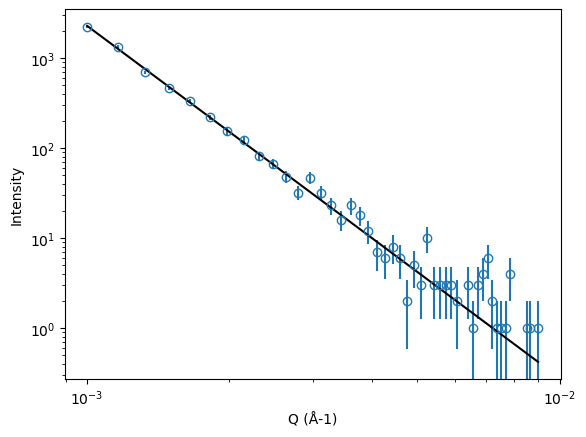

In [2]:
curv.generatebackground(xrange, ratio=1.0E-03)
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

## What about it do with multi-modal data?

This section shows why it is necessary to consider Lucy-Richardson deconvolution, Maximum-Entropy deconvolution, as iterative methods, since maximum likelihood and bayesian inference both assume that there is a single value of the parameter rather than a distribution.  In lots of real-world physical systems that are interesting, it is distributions that are important.

Generated 2000 samples using parameters [0.02]
Generated 2000 samples using parameters [0.0025]
Lorentzian curve maximum likelihood estimation
4000 data points
[0.0001] as initial guess (kappa)
[0.00777299]  +/- [0.00012642]? solution obtained numerically
[0.00777299] solution obtained numerically
That a maximum was found is True via second derivative


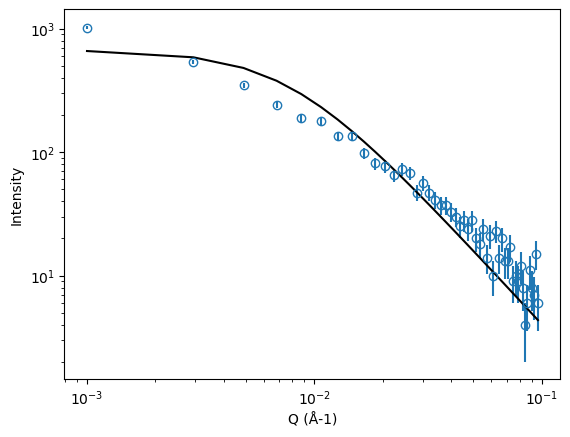

Correlation length: [128.65058503]


In [9]:
import emtk
import numpy as np
import matplotlib.pyplot as plt


npts=2000

c1 = 50.0 # correlation length in system
c2 = 400.0

kappa = 1.0 / c1
curv = emtk.curves.lorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, npts)

kappa2 = 1.0 / c2
curv2 = emtk.curves.lorentzianCurve()
pvalues = np.array([kappa2])
curv2.generateTestSamples(pvalues, xrange, npts)

curv.data = np.concatenate((curv2.data, curv.data))
np.random.shuffle(curv.data)

#curv.generatebackground(xrange, ratio=0.1) # method is resistant to a 10% background, which is pretty big
curv.mle()
#curv.report()
#curv.mleAnalytic()
curv.report()
curv.plotFit(logarithmic=True)
#a2 = curv.adtest()
#print("Anderson Darling test statistic:", a2)
#ks = curv.kstest()
#print("Kolmogorov Smirnov test statistic:", ks)
print("Correlation length:", 1.0/curv.estimates)

Yes, with multi-modal data it finds some middle-ground.  For arbitrary distributions, an iterative solution is required.  This means something like maximum-entropy, lucy-richardson (kind of iterative bayesian inference), or similar, so that tweaking one bin might help with convergence to optimality of another bin somewhere else.  Bayesian inference in the form above does not do this, which is why it cannot handle multi-modal distributions all that well.

# Real Data - Histogrammed "Standard Sample"

## Work in progress... 

1. ~~Get mantid working (the ISIS "standard" data set comes with mantid to reduce it)~~ done
2. **Check the fits with histogrammed data** - in progress
3. Try event mode using same methods.  This needs a look at the routines and grab just the part that converts TOF and angle into Q for each data point, so we have a big list of Qs.  This has been done on all major instruments and there is no point in reinventing the wheel.

Future tasks / problems:

4. ~~SANS correction of sample can, background, and transmission - how to do for each Q point without histogramming.  The solution I'm sure is **kernel density estimation** which we discussed earlier in the project.~~  Done with KDE, actually this was quite easy so I did this first.

In [ ]:
There are some tests using real-world data that are on-going.  See the files 

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

loqdata = h5py.File("data/SANS/LOQ/refdata/GFP_10mgml.h5", 'r+')

print(loqdata.keys())
print(type(loqdata['sasentry01']))
entry=loqdata['sasentry01']
print(list(entry))
print(list(entry['sasdata']))
dat=entry['sasdata']
daty = np.array(dat['I'])
datx = np.array(dat['Q'])

<KeysViewHDF5 ['sasentry01']>
<class 'h5py._hl.group.Group'>
['definition', 'run', 'sasdata', 'sasinstrument', 'sasprocess', 'title']
['I', 'Idev', 'Q']


/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_4235/2378191780.py:13: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  daty = np.array(dat['I'])
/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_4235/2378191780.py:14: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  datx = np.array(dat['Q'])


The analysis in the LOQ reference data paper (Myatt et al, DOI 10.3233/BSI-170167).  They were
plotting Guinnier plots, which assumes I(Q) = I0 * Exp(-Q**2 * R**2 / 3)

Text(0.5, 1.0, 'Guinier Plot of all data')

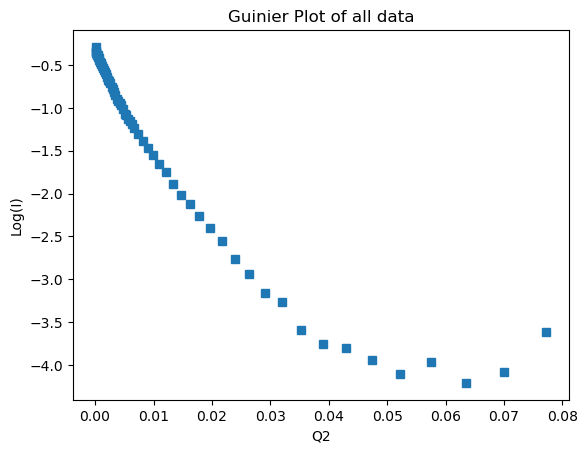

In [2]:
fig,ax=plt.subplots()
logi = np.log(daty)
q2 = datx ** 2.0
ax.plot(q2, logi,'s')
ax.set_xlabel('Q2')
ax.set_ylabel('Log(I)')
ax.set_title('Guinier Plot of all data')

Note that the data in the paper, figure 5, inset, has a maximum Q2 tick of 0.005.  There are 5 data points after that.  This corresponds to Q=0.07, so only the first half of the data is following Guiner scattering law.

Text(0.5, 1.0, 'Guinier Plot of Truncated Data')

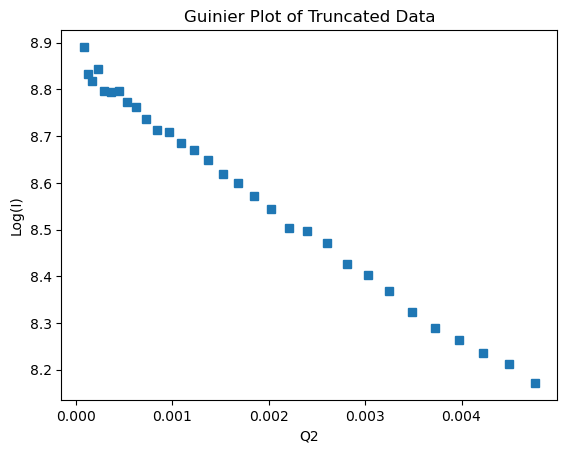

In [3]:
nnpts = datx.size / 2

mask = np.arange(nnpts).astype(int)
gunx = datx[mask]
guny = daty[mask]

scale = 3540.0 * 1.0 / np.amin(guny)#* 11.4

# Must scale up the y to sensible values.  This is calculated from the standard deviation of the fit errors and the x2 values
guny = guny * scale



fig,ax=plt.subplots()
logi = np.log(guny)
q2 = gunx ** 2.0
ax.plot(q2, logi,'s')
ax.set_xlabel('Q2')
ax.set_ylabel('Log(I)')
ax.set_title('Guinier Plot of Truncated Data')

In [5]:
# Lucy Richardson - this is tried first because MLE was not working.
# We will soon discover why MLE did not work!
import matplotlib.pyplot as plt

from importlib import reload

import bayesianInverse

model = bayesianInverse.bayesianGuinier()

model.datax = np.array(gunx)
model.datay = np.array(guny)

resto, errors = model.LR_deconv(niter=200, calcErrors=True)

Lucy-Richardson fit failed to converge after 200 iterations.
x2= 5183.85111754487


Text(0, 0.5, 'P(r)')

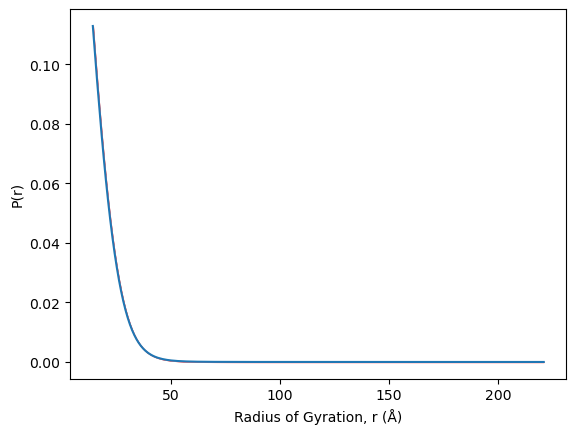

In [6]:
fity = model.getfity(resto, model.psf)

dats = np.sum(guny)
fits = np.sum(fity)
fity = fity * dats/fits

psf, rvals = model.calc_psf()

top = resto+errors

bot = np.maximum(resto-errors, np.zeros_like(resto))

fig, ax = plt.subplots()
ax.plot(rvals, resto)

ax.fill_between(rvals, top, bot, color='red', alpha=0.5)

ax.set_xlabel("Radius of Gyration, r (Å)")
ax.set_ylabel("P(r)")

Text(0.7, 0.95, '$\\chi ^{2}$=167.2210')

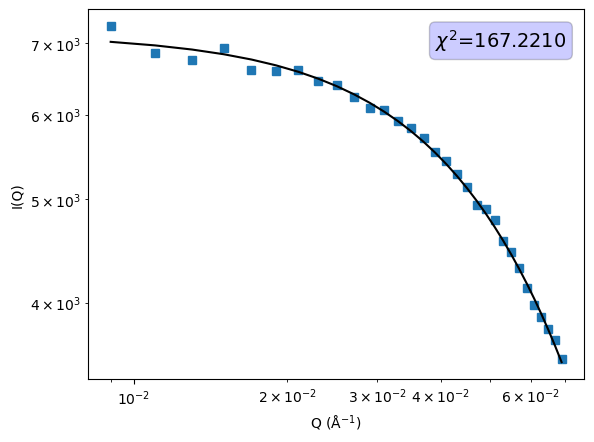

In [7]:
fig, ax = plt.subplots()
ax.plot(gunx, guny, 's')
ax.plot(gunx, fity, color='black')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Q (Å$^{-1}$)")
ax.set_ylabel("I(Q)")

chisq = model.x2(guny, fity)

insetstr = ''.join((r'$\chi ^{2}$=%.4f' % (chisq/guny.size)))
decs = dict(boxstyle='round', facecolor='blue', alpha=0.2)
ax.text(0.7, 0.95, insetstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=decs)



OK so NOW we can see what is wrong.  Because the y values are normalised to some tiny value, the analysis is not working.  The assumption in this code is that the neutron intensity is measured in counts.  This data is not!  The fit itself is OK for one iteration(!) but the x2 value is total nonsense.

This data set will be abandoned because it's not useful in the current context.

# Real Data - SCIPP data with ESS repo

In this section, we use the ESS environment in conda (anaconda).  EMTK requires powerlaw which exists in pip but not conda, so we might have to remove pip in the conda environment and reinstall if there are issues later on.

# Some notes on scipp

* Masks are arrays of booleans.  Therefore the masks as applied in the templates are working in histograms.
* scipp propagates variances in the normal way.  This might not be desired in event mode, since variances apply to histogram bins.  We need to watch out for potential bugs.
* 

In [6]:
import matplotlib.pyplot as plt
import scipp as sc
from ess import loki, sans
from ess.logging import configure_workflow
import scippneutron as scn

# Include effects of gravity?
gravity = True
# These TOF values are already binned - need to access each 
# TOF bin and within that object are an array of events



# Sample measurement
sample = loki.io.load_sans2d(loki.data.get_path('SANS2D00063114.hdf5'))
# Direct measurement is with the empty sample holder/cuvette
direct = loki.io.load_sans2d(filename=loki.data.get_path('SANS2D00063091.hdf5'))
# Load direct beam function for main detector
direct_beam = sc.io.load_hdf5(
    loki.data.get_path('DIRECT_SANS2D_REAR_34327_4m_8mm_16Feb16.hdf5')
)
# Inspect sample data
sample

<scipp.DataArray>
Dimensions: Sizes[spectrum:61440, tof:1, ]
Coordinates:
  pixel_height              float64              [m]  ()  0.00203398
  pixel_width               float64              [m]  ()  0.0035
  position                  vector3              [m]  (spectrum)  [(-0.5192, -0.48095, 23.281), (-0.517162, -0.48095, 23.281), ..., (0.517162, 0.48295, 23.281), (0.5192, 0.48295, 23.281)]
  sample_position           vector3              [m]  ()  (0, 0, 19.334)
  source_position           vector3              [m]  ()  (0, 0, 0)
  spectrum                    int32        <no unit>  (spectrum)  [9, 10, ..., 61447, 61448]
  tof                       float64            [µs]  (tof [bin-edge])  [4.94618, 100006]
Data:
                          DataArrayView        <no unit>  (spectrum, tof)  binned data: dim='event', content=DataArray(
          dims=(event: 6831225),
          data=float32[counts],
          coords={'tof':float64[µs], 'pulse_time':datetime64[ns]})
Attributes:
  Changer                 DataArray        <no unit>  ()  DataArray(dims=(time: 2), dtype=string, unit=dimensionless)
  Det_Temp_FLB            DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Det_Temp_FLT            DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Det_Temp_FRB            DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Det_Temp_FRT            DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Det_Temp_RLB            DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Det_Temp_RLT            DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Det_Temp_RRB            DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Det_Temp_RRT            DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Fast_Shutter            DataArray        <no unit>  ()  DataArray(dims=(time: 4), dtype=string, unit=dimensionless)
  Filename                   string  [dimensionless]  ()  "/home/nvaytet/.cache/ess/loki/1/SANS2D00063114.nxs"
  Front_Baffle_Z          DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Front_Det_HT            DataArray        <no unit>  ()  DataArray(dims=(time: 2), dtype=string, unit=dimensionless)
  Front_Det_Rot           DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Front_Det_X             DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Front_Det_Z             DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Front_Stop_Rot          DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Front_Strip             DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Guide1                  DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Guide2                  DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Guide3                  DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Guide4                  DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Guide5                  DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Guide_Pressure          DataArray        <no unit>  ()  DataArray(dims=(time: 3), dtype=float64, unit=dimensionless)
  Height                  DataArray        <no unit>  ()  DataArray(dims=(time: 2), dtype=string, unit=dimensionless)
  ICP_DAE_TD              DataArray        <no u

In [13]:
print(sample.data)
sc.show(sample.data)

<scipp.Variable> (spectrum: 61440, tof: 1)  DataArrayView        <no unit>  binned data: dim='event', content=DataArray(
          dims=(event: 6831225),
          data=float32[counts],
          coords={'tof':float64[µs], 'pulse_time':datetime64[ns]})


In [18]:
print(sample.data['event'])

TypeError: __getitem__(): incompatible function arguments. The following argument types are supported:
    1. (self: scipp._scipp.core.Variable, arg0: int) -> scipp._scipp.core.Variable
    2. (self: scipp._scipp.core.Variable, arg0: slice) -> scipp._scipp.core.Variable
    3. (self: scipp._scipp.core.Variable, arg0: scipp._scipp.core.Variable) -> scipp._scipp.core.Variable
    4. (self: scipp._scipp.core.Variable, arg0: Tuple[str, int]) -> scipp._scipp.core.Variable
    5. (self: scipp._scipp.core.Variable, arg0: Tuple[str, slice]) -> scipp._scipp.core.Variable
    6. (self: scipp._scipp.core.Variable, arg0: ellipsis) -> scipp._scipp.core.Variable
    7. (self: scipp._scipp.core.Variable, arg0: List[int]) -> scipp._scipp.core.Variable
    8. (self: scipp._scipp.core.Variable, arg0: Tuple[str, List[int]]) -> scipp._scipp.core.Variable

Invoked with: <scipp.Variable> (spectrum: 61440, tof: 1)  DataArrayView        <no unit>  binned data: dim='event', content=DataArray(
          dims=(event: 6831225),
          data=float32[counts],
          coords={'tof':float64[µs], 'pulse_time':datetime64[ns]}), 'event'

# Missing Features List

The following might be interesting
* pytest? --- done
* distribution & statistical testing? 
* sphinx? - like doxygen.  Read about it and rejected it

# open data catalogues
data.ill.eu - similar catalogue at ISIS
data.panasc.eu

QUENS data is almost always lorenzian 

Also check this:
https://github.com/DAaaS-reference-data
This last one might be the most useful, it looks like a clean lorentzian curve and there is also a reflectivity curve there.

# Desired outcome

Event mode
Fit to some distribution
Plot of estimated parameter vs events used, with error bar, compared to the traditional way of doing it.
Should ask Wojciech to do an analysis with which we compared

# Links
* https://confluence.esss.lu.se/display/DCC/Owncloud (info about DMSC owncloud server)
* https://docs.google.com/document/d/1dOnBtLCSYZ__7IK479Qb8eYivxP-nBejNLA-WrmV_UA/edit (LENS board SANS standards document)
* https://marketplace.sasview.org (SASVIEW library of models, we should try to implement most of these in the end)
* https://content.iospress.com/articles/journal-of-neutron-research/jnr220002 (guidelines for development of software)

ESS does not use mantid (thank god) 

* https://easyscience.software ESS easy stuff -> easyDiffraction, easyReflectometry.
* http://github.com/scipp ESS library for handling data sets, propagating uncertainties, multi-dimensions etc.
* https://scipp.github.io/getting-started/overview.html

